<a href="https://colab.research.google.com/github/Muhamedirfan6/Cross_Sell_model/blob/main/Cross_up_Sell_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cross-sell Prediction**

---



### **Overview**
Cross-selling identifies products or services that satisfy additional, complementary needs that are unfulfilled by the original product that a customer possesses. As an example, a mouse could be cross-sold to a customer purchasing a keyboard. Oftentimes, cross-selling points users to products they would have purchased anyways; by showing them at the right time, a store ensures they make the sale.
Cross-selling is prevalent in various domains and industries including banks. For example, credit cards are cross-sold to people registering a savings account. In ecommerce, cross-selling is often utilized on product pages, during the checkout process, and in lifecycle campaigns. It is a highly-effective tactic for generating repeat purchases, demonstrating the breadth of a catalog to customers. Cross-selling can alert users to products they didn't previously know you offered, further earning their confidence as the best retailer to satisfy a particular need.

### **Data columns definitions**
Variable Definition id Unique ID for the customer Gender Gender of the customer Age
Age of the customer
Driving_License 0 : Customer does not have DL, 1 : Customer already has DL Region_Code Unique code for the region of the customer Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance Vehicle_Age Age of the Vehicle  Vehicle_Damage
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past. Annual_Premium The amount customer needs to pay as premium in the year Policy_Sales_Channel Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. Vintage Number of Days, Customer has been associated with the company Response 1 :  Customer is interested, 0 : Customer is not interested

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')


### **Data Collection**


In [2]:
# Import files to colab from local disk
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
# Loading data to colab 
data = pd.read_csv('train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#Description of the train data
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# Importing test data to colab from local file
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [6]:
# Loading test data 
test_data = pd.read_csv('test.csv')
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
#Description of the test data
test_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


### **Data Description**


In [8]:
#Data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [10]:
# Creating copies of the data
train = data.copy()
test = test_data.copy()

## **Exploratory Data Analysis(EDA)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


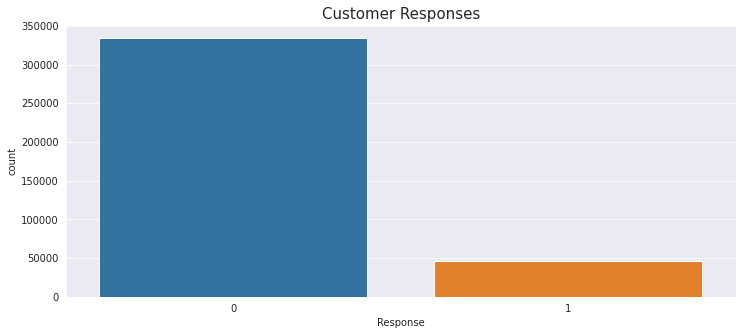

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(train['Response'])
plt.title('Customer Responses', fontsize = 15 )
plt.show()

In [12]:
# Calculating posetive and negative smaples in percentages. 
positive_percentage =len(train[train['Response'] == 1])/ len(data)*100
negative_percentage =len(train[train['Response'] == 0]) / len(data)*100
percentage = [positive_percentage,negative_percentage]


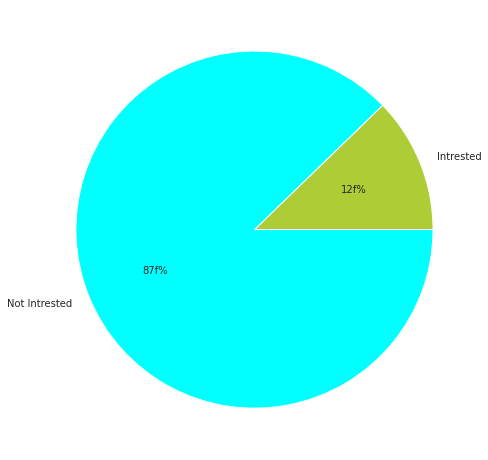

In [13]:
# Creating a pie chart 
plt.figure(figsize= (8,10))
plt.pie(percentage, labels=['Intrested', 'Not Intrested'], autopct = '%.if%%', colors = ['#aecc35', 'cyan'])
plt.show()

###### **From the avobe graph it is clear that this dataset is imbalanced. The percentage of customers who are intrested for a vehicle insurance is only 12% compared to those who are not intrested to opt for a vechicle insurance.**


###### **Exploring the age of the customers.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


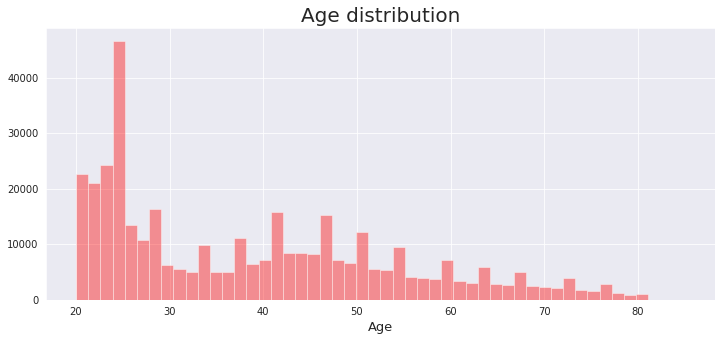

In [14]:
plt.figure(figsize = (12,5))
sns.distplot(train['Age'], kde = False, color = 'Red')
plt.xlabel('Age', fontsize = 13)
plt.title('Age distribution', fontsize = 20)
plt.show()

###### **Exploring the gender of the customers along with their intrest
**

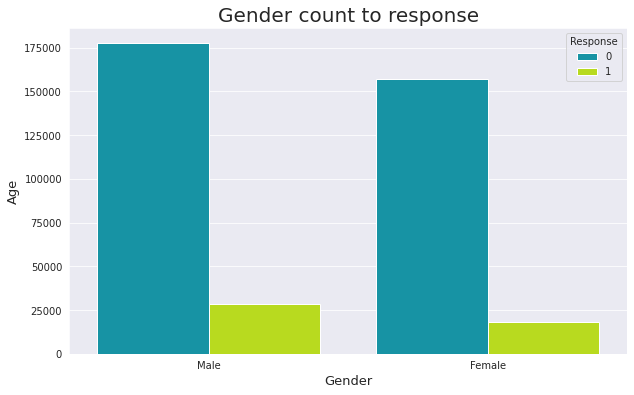

In [15]:
plt.figure(figsize = (10, 6))
sns.countplot(data = train, x = 'Gender', hue = 'Response', palette = 'nipy_spectral')
plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Age', fontsize = 13)
plt.title('Gender count to response', fontsize = 20)
plt.show()

###### **Customers with a driving license**

In [16]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


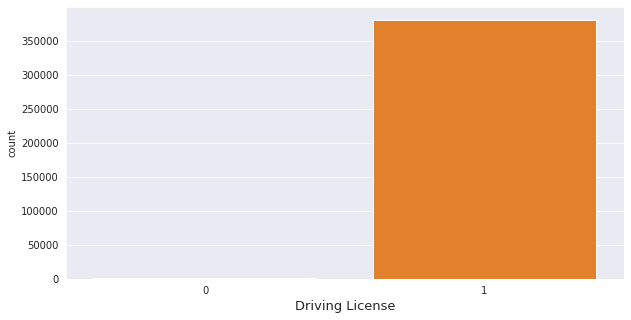

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(train['Driving_License'])
plt.xlabel('Driving License', fontsize= 13)
plt.show()

###### **Age of the vehicle vs customer response**

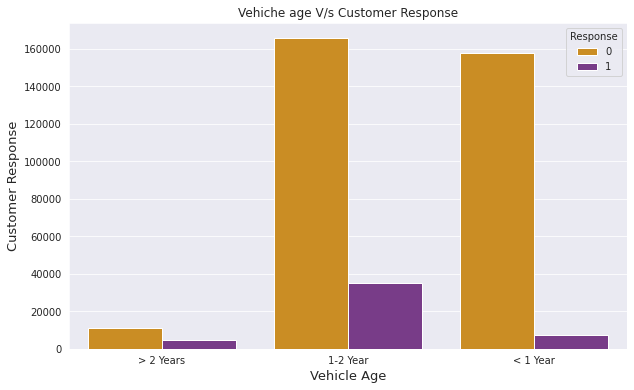

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data = train, x ="Vehicle_Age", hue = 'Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize = 13)
plt.ylabel('Customer Response', fontsize = 13)
plt.title("Vehiche age V/s Customer Response")
plt.show()

From the above graph it is clear clear that customers with vehivle age 1-2 years are more inclined to opt fot the insurance

###### **Calcualting the vehicles that hase been damaged**

In [19]:
vehicles =train[train['Vehicle_Age'] == '1-2 Year']

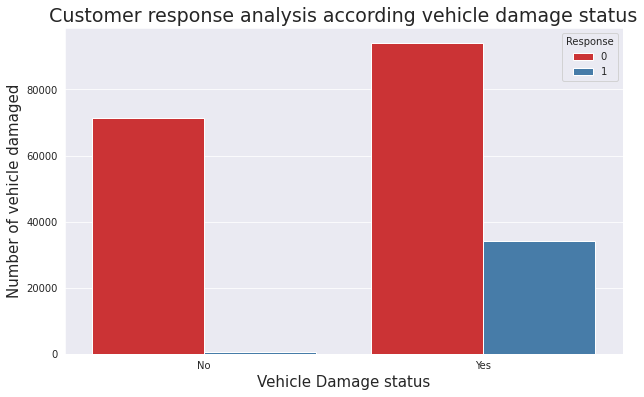

In [20]:
plt.figure(figsize = (10,6) )
sns.countplot(data = vehicles, x = 'Vehicle_Damage', hue = 'Response', palette='Set1')
plt.xlabel('Vehicle Damage status', fontsize = 15)
plt.ylabel('Number of vehicle damaged', fontsize = 15)
plt.title('Customer response analysis according vehicle damage status', fontsize = 19)
plt.show()

######**As expected, those customers who have a damaged vehicle tend to take the vehicle insurance**

######**Annual premiuim distribution**

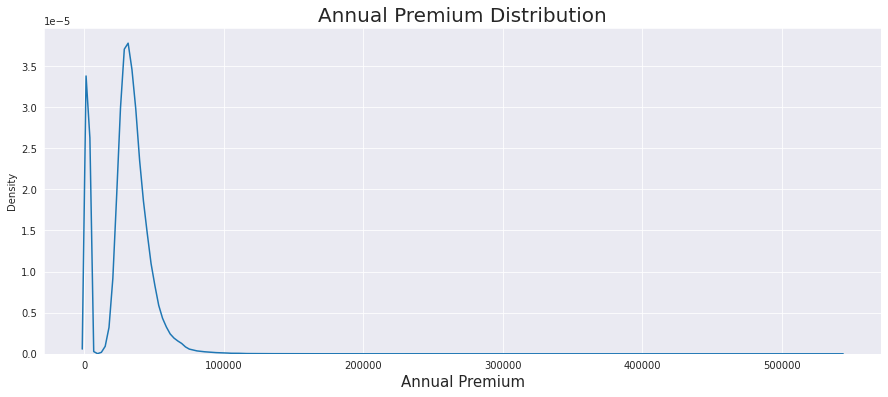

In [21]:
plt.figure(figsize=(15,6))
sns.kdeplot(data['Annual_Premium'])
plt.xlabel('Annual Premium', fontsize = 15)
plt.title('Annual Premium Distribution', fontsize = 20)
plt.show()

###### **Policy Sales Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


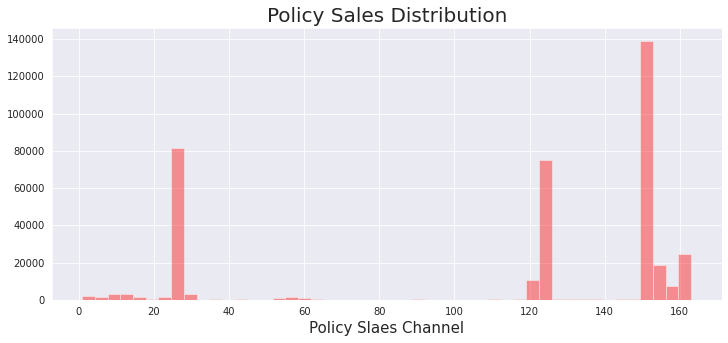

In [22]:
plt.figure(figsize=(12,5))
                    
sns.distplot(train["Policy_Sales_Channel"], kde = False , color = 'red')
plt.xlabel('Policy Slaes Channel', fontsize = 15)
plt.title('Policy Sales Distribution', fontsize = 20)
plt.show()

###### **Region Code Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


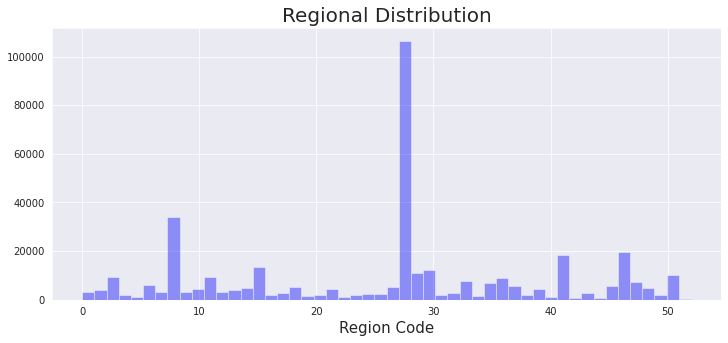

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(train['Region_Code'], kde =False, color='blue')
plt.xlabel('Region Code', fontsize = 15)
plt.title('Regional Distribution', fontsize = 20)
plt.show()

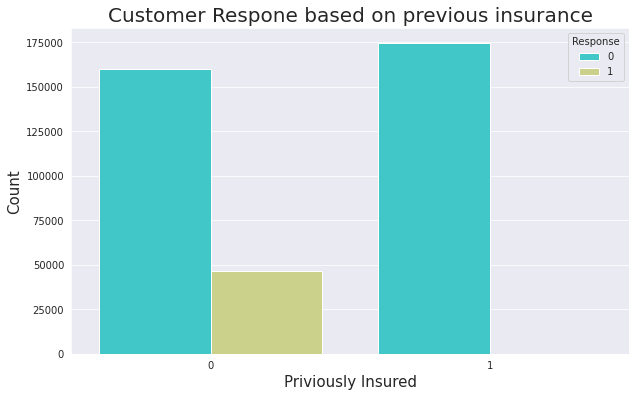

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Previously_Insured', hue = 'Response', palette= "rainbow")
plt.xlabel('Priviously Insured', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.title("Customer Respone based on previous insurance", fontsize= 20)
plt.show()

###### **The above graph helps in realising how many of the existing customers with a policy and will be hesitant to take up another insurance**

######**Correlation Heatmap**

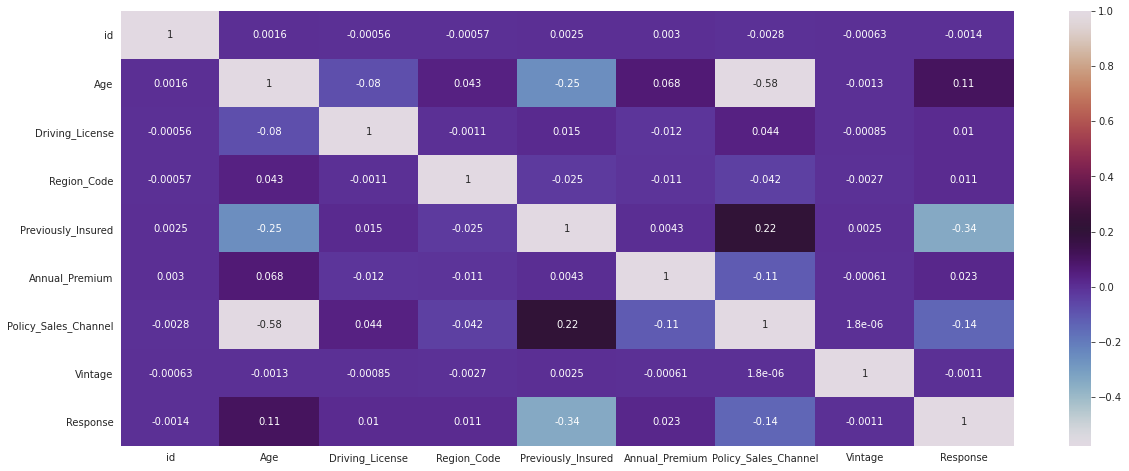

In [25]:
plt.figure(figsize=(20,8))
sns.heatmap(train.corr(), cmap = 'twilight', annot= True)
plt.show()

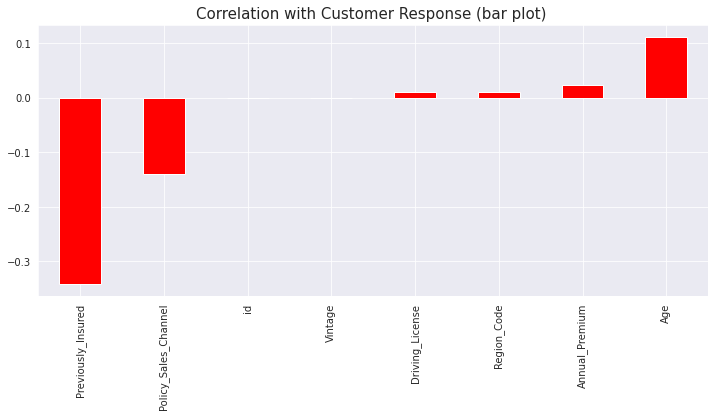

In [26]:
plt.figure(figsize=(12,5))
train.corrwith(train['Response']).sort_values().drop('Response').plot(kind='bar', color = 'red')
plt.title('Correlation with Customer Response (bar plot) ', fontsize= 15)
plt.show()


######Vintage column has almost no correlation with Customer Response. That means a customer who is connected to the company for a long time does'nt necessarily mean that he/she will take the vehicle insurance.

### **Model Selection**

We will be using few models to and store their result to further understand which model performed the best to the given dataset
Models used will be:

1.   Randon forest
2.   XGBoost
3.   CatBoost
4.   Light GMB (LGBM)
5.   Desision Tree



We will store the restul in a data frame to comapre the result to see the model performance

### **Importing necessary libraries**

In [27]:
import warnings
from sklearn.metrics import roc_auc_score, accuracy_score

warnings.filterwarnings('ignore')

In [28]:
def preprocessing(data):
    
    # Dropping null values
    data = data.dropna()
    
    # Dropping id column
    data = data.drop('id', axis=1)
    
    # Columns needed 
    cols = ['Gender','Vehicle_Damage', 'Vehicle_Age']
    
    # Changing the categories in to dummies
    data_dum= pd.get_dummies(data=data, columns = cols, drop_first=True)
    
    # Also drop vintage columns as it does not correlate with the dependent variables 
    data_dum = data_dum.drop('Vintage', axis = 1)
    
    return data_dum

In [29]:
#Preproseccing train data
train_dum = preprocessing(train)

#Preprossing test data
test_dum = preprocessing(test)

In [30]:
# Assigning inputs and targets

inputs = train_dum.drop('Response', axis=1)
targets= train_dum['Response']

x_test= test_dum.copy()

### **Splitting data**

We will use stratified K-Fold from sklearn as this is a highly imbalanced dataset Stratified K-Folds cross-validator. Provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. Parameters n_splitsint, default=5.

In [31]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

for train_idx, val_idx in skf.split(inputs, targets):
    x_train, x_val = inputs.iloc[train_idx], inputs.iloc[val_idx]
    y_train, y_val = targets.iloc[train_idx], targets.iloc[val_idx]

In [32]:
#Scaling all input data
    
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

#Will use only transform for validation and test data as we don't want any data leakage
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

### **1. Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, n_estimators = 500)

rf.fit(x_train_scaled,y_train)

y_val_pred = rf.predict_proba(x_val_scaled)[:,1]

score1 = roc_auc_score(y_val, y_val_pred)
print(score1)

0.8563077363319613


We will store the restul in a data frame to comapre the result to see the model performance

In [34]:
Results = pd.DataFrame(columns=['Model','Validation score'])

In [35]:
Results

,Model,Validation score


In [36]:
Results = Results.append({'Model' : 'Random Forest', 'Validation Score': score1}, ignore_index = True)

In [37]:
Results

,Model,Validation score,Validation Score
0,Random Forest,NaN,0.856308


### **2. XGBoost**

In [38]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state = 42, learning_rate = 0.1)

xg.fit(x_train_scaled, y_train)

y_val_pred = xg.predict_proba(x_val_scaled)[:,1]

score = roc_auc_score(y_val, y_val_pred)
print(score)

0.85835584242268


In [39]:
Results =Results.append({'Model': 'XGBoost', 'Validation Score': score}, ignore_index= True)

In [40]:
Results

,Model,Validation score,Validation Score
0,Random Forest,NaN,0.856308
1,XGBoost,NaN,0.858356


### **3. CatBoost**

In [41]:
!pip3 install catboost

     |████████████████████████████████| 67.4 MB 31 kB/s 


In [42]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(x_train_scaled, y_train, plot=True, early_stopping_rounds=30, verbose=100)

y_val_pred = cat.predict_proba(x_val_scaled)[:,1]

score = roc_auc_score(y_val, y_val_pred)
print(score)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.124596
0:	learn: 0.4964019	total: 173ms	remaining: 2m 53s
100:	learn: 0.2640546	total: 11.1s	remaining: 1m 38s
200:	learn: 0.2621656	total: 22.2s	remaining: 1m 28s
300:	learn: 0.2608039	total: 33.3s	remaining: 1m 17s
400:	learn: 0.2596961	total: 44.5s	remaining: 1m 6s
500:	learn: 0.2586209	total: 55.7s	remaining: 55.5s
600:	learn: 0.2575987	total: 1m 7s	remaining: 44.5s
700:	learn: 0.2566135	total: 1m 18s	remaining: 33.4s
800:	learn: 0.2557489	total: 1m 29s	remaining: 22.3s
900:	learn: 0.2549947	total: 1m 41s	remaining: 11.1s
999:	learn: 0.2541714	total: 1m 52s	remaining: 0us
0.861474536765339


In [43]:
Results = Results.append({'Model':'CatBoost', 'Validation Score': score}, ignore_index= True)

In [44]:
Results

,Model,Validation score,Validation Score
0,Random Forest,NaN,0.856308
1,XGBoost,NaN,0.858356
2,CatBoost,NaN,0.861475


### **4. LGBM**

In [45]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

lgbm = LGBMClassifier(num_leaves = 30, max_depth = 5, n_estimators = 550, learning_rate = 0.05, objective = 'binary', 
                      lambda_l2 = 12,
                      max_bin = 100, metric = 'auc', is_unbalance = True, random_state = None, n_jobs = -1)

lgbm.fit(x_train_scaled,y_train)

y_val_pred = lgbm.predict_proba(x_val_scaled)[:,1]

score = roc_auc_score(y_val, y_val_pred)
print(score)

0.86276903948587


In [46]:
Results = Results.append({'Model':'LGBM',"Validation Score": score }, ignore_index= True)

In [47]:
Results 

,Model,Validation score,Validation Score
0,Random Forest,NaN,0.856308
1,XGBoost,NaN,0.858356
2,CatBoost,NaN,0.861475
3,LGBM,NaN,0.862769


##### **From the above table we can arrive at a conclusion that the model perform best with the LGBM model with a validation score of 0.862769.**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

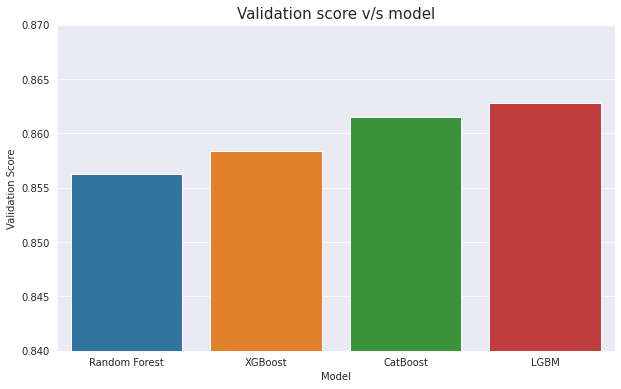

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(data = Results, y = 'Validation Score', x = 'Model')
plt.title('Validation score v/s model', fontsize = 15)
plt.ylim(0.84,0.87)
plt.show()